In [55]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import (
    cross_val_score
)

from sklearn.metrics import mean_squared_error

The objective of the notebook is to demonstrate the process of fitting regression models for multiple outputs.

# **Info**
---

**@By:** Kaiziferr

**@Git:** https://github.com/Kaiziferr

# **Config**

---



In [56]:
plt.style.use('ggplot')
random_seed = 12354
warnings.filterwarnings('ignore')

# **Data**
---



A synthetic dataset of 500 records is generated, with 10 features, 6 of which are informative, an error noise of 0.75, and two outputs.

In [57]:
X, y = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=6,
    n_targets=2,
    random_state = random_seed,
    noise=0.75)

A data frame is created.

In [58]:
data = pd.DataFrame(
    np.concatenate(
        (X, y.reshape(-1, 2)),
        axis=1), columns=[
            f'X{i}' for i in range(1, 11)] + [f'y{i}' for i in range(1, 3)]).head()

A function is set up to instantiate models with default data.

• lr: Linear Regression

• knn: KNeighborsRegressor

• Tree: DecisionTreeRegressor

• RandomForest: RandomForestRegressor

In [59]:
def get_models():
  models = []
  models.append(('lr', LinearRegression()))
  models.append(('knn', KNeighborsRegressor()))
  models.append(('Tree', DecisionTreeRegressor(random_state=random_seed, max_depth=8)))
  models.append(('RandomForest', RandomForestRegressor(random_state=random_seed)))
  return models

In [60]:
def plot_real_vs_pred(y_true, y_predict)->None:

  try:

    n_outputs = y_true.shape[1]

    plt.figure(figsize=(5 * n_outputs, 4))

    for i in range(n_outputs):
      plt.subplot(1, n_outputs, i + 1)
      plt.scatter(y_true[:, i], y_predict[:, i], alpha=0.4, color='g')
      plt.plot([y_true[:, i].min(), y_true[:, i].max()],
                 [y_true[:, i].min(), y_true[:, i].max()], 'b--')
      plt.title(f"Real vs. Predicted: output {i+1}")
      plt.xlabel("Real")
      plt.ylabel("Predicted")

    plt.tight_layout()
    plt.show()
  except Exception as e:
    print(e)

In [61]:
models = get_models()

::::::::::::::::::::::: lr :::::::::::::::::::::::


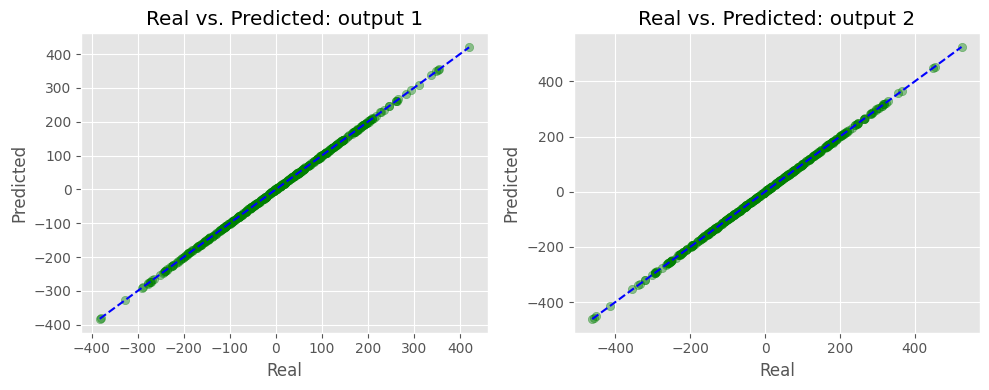

::::::::::::::::::::::: knn :::::::::::::::::::::::


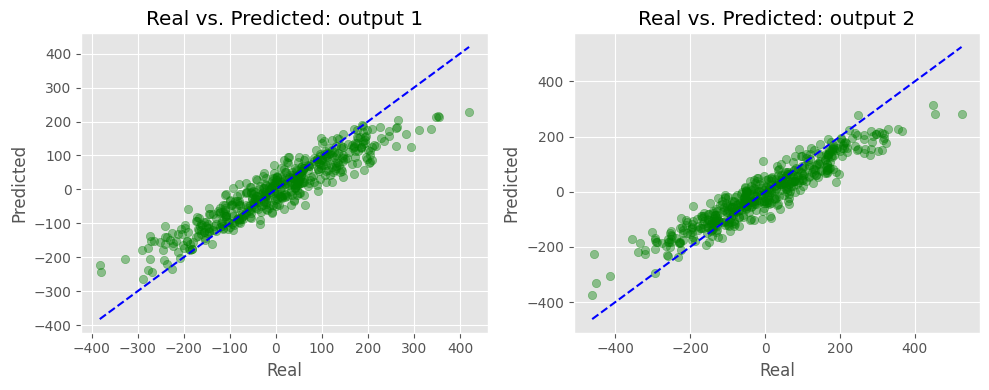

::::::::::::::::::::::: Tree :::::::::::::::::::::::


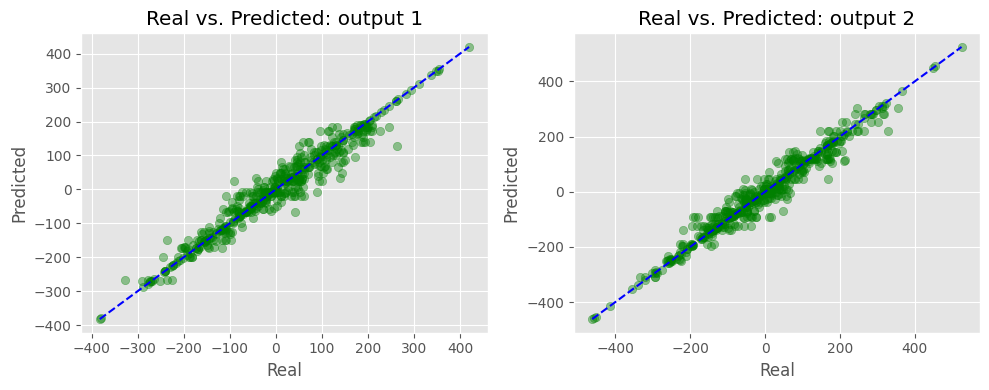

::::::::::::::::::::::: RandomForest :::::::::::::::::::::::


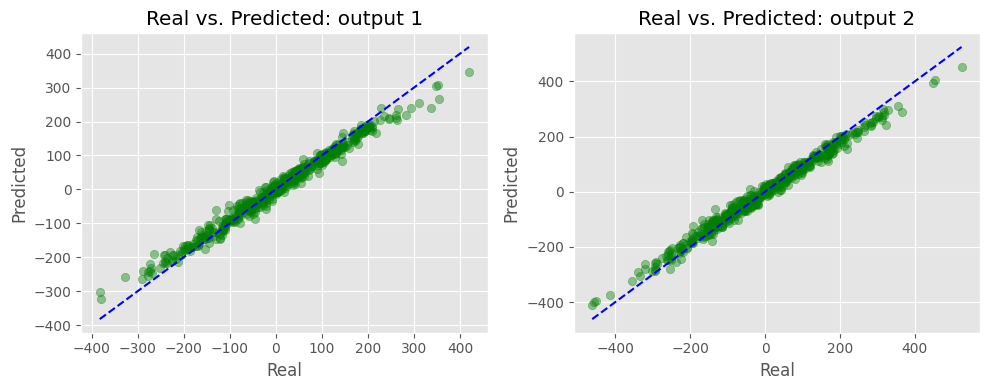

In [62]:
score_cv = []
score_metric = []
for model in models:
  name_model = model[0]
  model = model[1]
  score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
  score_cv.append((name_model, np.mean(score), np.std(score)))
  y_predict = model.fit(X, y).predict(X)
  print(f"::::::::::::::::::::::: {name_model} :::::::::::::::::::::::")
  plot_real_vs_pred(y, y_predict)
  score_metric.append((name_model, (
      mean_squared_error(y[:, 0], y_predict[:, 0]), mean_squared_error(y[:, 1], y_predict[:, 1]))))

The model with the smallest absolute loss is the linear regression on both variables; it is the model that fit best. The model with the most issues was KNN, with the highest error on both variables. Interestingly, the models—except for KNN—had errors that were not too far apart in relation to the output.

In [63]:
pd.DataFrame(
    [(i[0], i[1][0], i[1][1])  for i in score_metric],
    columns=['Model', 'MAE_y1', 'MAE_y2'])

,Model,MAE_y1,MAE_y2
0,lr,0.566101,0.475529
1,knn,2784.571694,3647.580897
2,Tree,936.842490,1057.318841
3,RandomForest,457.712737,531.148285


# **Info**
---

**@By:** Kaiziferr

**@Git:** https://github.com/Kaiziferr